In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import pandas as pd
%matplotlib inline

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/vaibhavwalvekar/NYC-Flights-2013-Dataset-Analysis/master/flights.csv')
dw = pd.read_csv('https://raw.githubusercontent.com/vaibhavwalvekar/NYC-Flights-2013-Dataset-Analysis/master/weather.csv')

In [3]:
df.head()

,Unnamed: 0,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
0,1,2013,1,1,517.0,2.0,830.0,11.0,UA,N14228,1545,EWR,IAH,227.0,1400,5.0,17.0
1,2,2013,1,1,533.0,4.0,850.0,20.0,UA,N24211,1714,LGA,IAH,227.0,1416,5.0,33.0
2,3,2013,1,1,542.0,2.0,923.0,33.0,AA,N619AA,1141,JFK,MIA,160.0,1089,5.0,42.0
3,4,2013,1,1,544.0,-1.0,1004.0,-18.0,B6,N804JB,725,JFK,BQN,183.0,1576,5.0,44.0
4,5,2013,1,1,554.0,-6.0,812.0,-25.0,DL,N668DN,461,LGA,ATL,116.0,762,5.0,54.0


In [4]:
dw.head()

,Unnamed: 0,origin,year,month,day,hour,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib
0,1,EWR,2013,1.0,1.0,0.0,37.04,21.92,53.97,230.0,10.35702,11.918651,0.0,1013.9,10.0
1,2,EWR,2013,1.0,1.0,1.0,37.04,21.92,53.97,230.0,13.80936,15.891535,0.0,1013.0,10.0
2,3,EWR,2013,1.0,1.0,2.0,37.94,21.92,52.09,230.0,12.65858,14.567241,0.0,1012.6,10.0
3,4,EWR,2013,1.0,1.0,3.0,37.94,23.00,54.51,230.0,13.80936,15.891535,0.0,1012.7,10.0
4,5,EWR,2013,1.0,1.0,4.0,37.94,24.08,57.04,240.0,14.96014,17.215830,0.0,1012.8,10.0


# 1
Find out how flight delays are related to the time of year

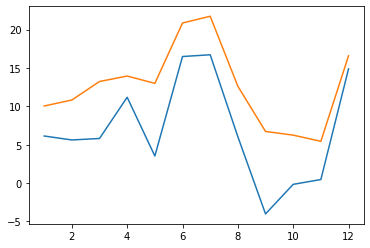

In [11]:
f_arr = df.groupby('month')['arr_delay'].mean()
f_dep = df.groupby('month')['dep_delay'].mean()

plt.plot(f_arr)
plt.plot(f_dep)
plt.show()  

We see that the biggest problems are in the summer months and december, and at the beginning of school season delays are small 

# 2

proportion of flights from each airport of NYC

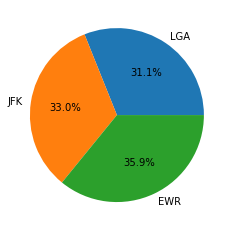

In [8]:
from_lga=len(df[df['origin']=='LGA'])
from_jfk=len(df[df['origin']=='JFK'])
from_ewr=len(df[df['origin']=='EWR'])

labels = 'LGA', 'JFK', 'EWR'
sizes=[from_lga,from_jfk,from_ewr]
plt.pie(sizes,  labels=labels, autopct='%1.1f%%')
plt.show()

# 3
Compare delays during the day

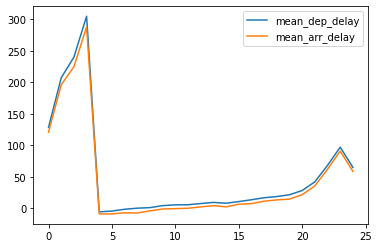

In [13]:
dep_hour=df.groupby('hour')['dep_delay'].mean()
arr_hour=df.groupby('hour')['arr_delay'].mean()

plt.plot(dep_hour, label='mean_dep_delay')
plt.plot(arr_hour, label='mean_arr_delay')
plt.legend()
plt.show()

We see that delays are most frequent early at the morning

# 4, 5
Which is the worst carrier

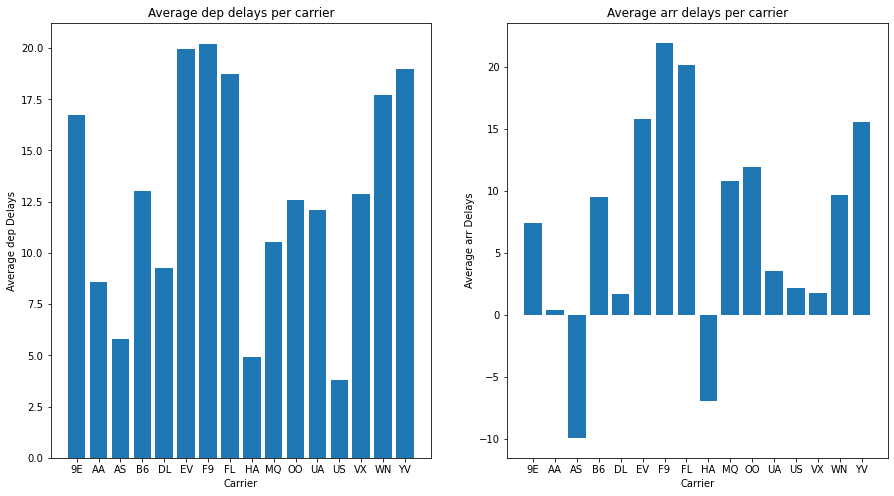

In [40]:
dep_carrier=df.groupby('carrier')['dep_delay'].mean().reset_index(name='dep_delay')
arr_carrier=df.groupby('carrier')['arr_delay'].mean().reset_index(name='arr_delay')

carrier=dep_carrier['carrier']
dep_delay=dep_carrier['dep_delay']
arr_delay=arr_carrier['arr_delay']

plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
plt.bar(carrier, dep_delay)
plt.ylabel('Average dep Delays')
plt.xlabel('Carrier')
plt.title('Average dep delays per carrier')

plt.subplot(1,2,2)
plt.bar(carrier, arr_delay)
plt.ylabel('Average arr Delays')
plt.xlabel('Carrier')
plt.title('Average arr delays per carrier')
plt.show()

In [42]:
f2 = df.groupby(['carrier']).agg({'dep_delay': [min, max, 'mean']})

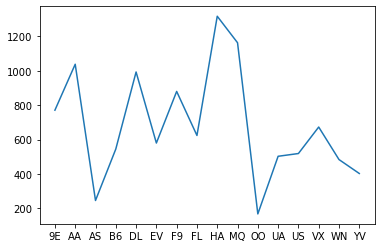

In [48]:
plt.plot(abs(f2[max]-f2[min]))
plt.show()

4 - US is the best in average dep delay, F9 is the worst

5 - max delay of HA is longer than others and max delay of OO is shorter than others

# 6
percentage of delayed flights in three airports of NYC

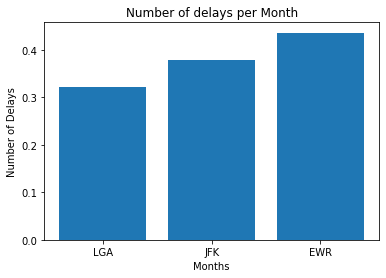

In [41]:
from_lga=df[df['origin']=='LGA']
amount_lga=len(from_lga)
delayed_lga=from_lga[from_lga['dep_delay']>0]
amount_delayed_lga=len(delayed_lga)

from_jfk=df[df['origin']=='JFK']
amount_jfk=len(from_jfk)
delayed_jfk=from_jfk[from_jfk['dep_delay']>0]
amount_delayed_jfk=len(delayed_jfk)

flights_ewr=df[df['origin']=='EWR']
amount_ewr=len(flights_ewr)
delayed_ewr=flights_ewr[flights_ewr['dep_delay']>0]
amount_delayed_ewr=len(delayed_ewr)

airports=['LGA','JFK','EWR']
percentage_of_delayed=[amount_delayed_lga/amount_lga,
                       amount_delayed_jfk/amount_jfk,
                       amount_delayed_ewr/amount_ewr]

plt.bar(airports, percentage_of_delayed)
plt.ylabel('Number of Delays')
plt.xlabel('Months')
plt.title('Number of delays per Month')
plt.show()

we see that the least percentage of delays has LGA

# 7, 8
How are delays and weather connected?

In [27]:
fw = df.groupby(['month','day', 'hour'])['dep_delay'].mean()
ww = dw.groupby(['month','day', 'hour'])['wind_speed'].mean()
fw = pd.merge(fw, ww, on = ['month', 'day', 'hour'])
fw.head()

dep_delay  wind_speed
month day hour                       
1     1   6.0   -1.156863    10.35702
          7.0    1.378378     8.05546
          8.0   14.109375    11.50780
          9.0    6.019231    12.65858
          10.0   0.512821    12.65858

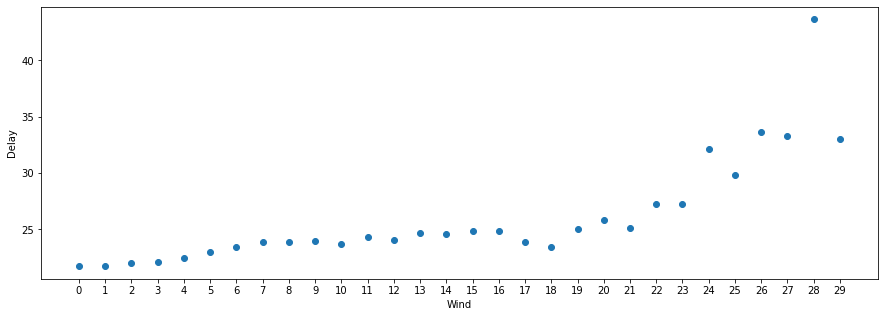

In [28]:
fw = fw.sort_values(by=['wind_speed'], ascending=False)
fw = fw.dropna(subset = ['wind_speed', 'dep_delay'])
fw = fw.abs()
a = []
b = []
for i in range (30):
    a.append(fw.loc[((fw['wind_speed']<i+10) & (fw['wind_speed'] > i))].mean()[0])
    b.append(str(i))
    
plt.figure(figsize=(15, 5))
plt.scatter(b, a)
plt.ylabel('Delay')
plt.xlabel('Wind')
plt.show()

7: Stronger wind - longer delay

In [35]:
fw = df.groupby(['month','day', 'hour'])['dep_delay'].mean()
ww = dw.groupby(['month','day', 'hour'])['visib'].mean()
fw = pd.merge(fw, ww, on = ['month', 'day', 'hour'])
fw.head()

dep_delay  visib
month day hour                  
1     1   6.0   -1.156863   10.0
          7.0    1.378378   10.0
          8.0   14.109375   10.0
          9.0    6.019231   10.0
          10.0   0.512821   10.0

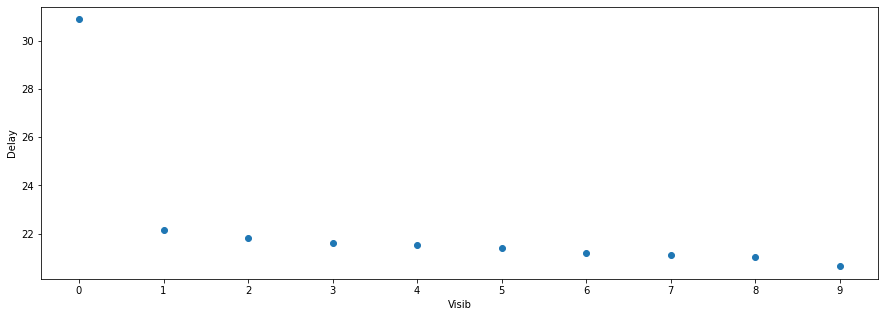

In [36]:
fw = fw.sort_values(by=['visib'], ascending=False)
fw = fw.dropna(subset = ['visib', 'dep_delay'])
fw = fw.abs()
a = []
b = []
for i in range (30):
    a.append(fw.loc[((fw['visib']<i+10) & (fw['visib'] > i))].mean()[0])
    b.append(str(i))
    
plt.figure(figsize=(15, 5))
plt.scatter(b, a)
plt.ylabel('Delay')
plt.xlabel('Visib')
plt.show()

8: less visib - longer delay

# 9
Is visib connected with wind speed?

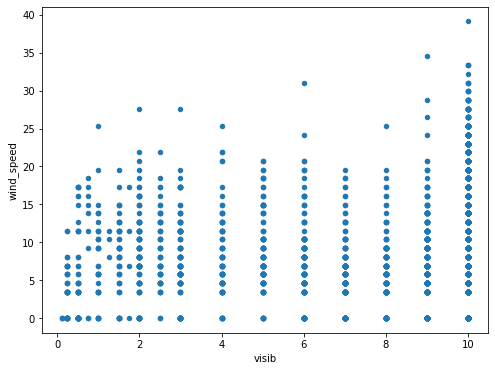

In [30]:
fv = dw.loc[(dw['wind_speed'] < 40)]
fv.plot.scatter(x = 'visib', y = 'wind_speed', figsize=(8, 6))
plt.show()

With strong winds always good visibility

# 10
Is visib connected with humid of wind?

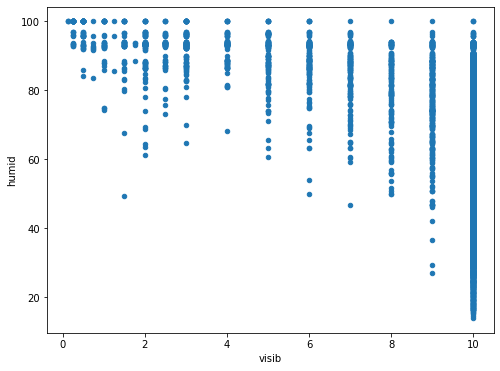

In [31]:
dw.plot.scatter(x = 'visib', y = 'humid', figsize=(8, 6))
plt.show()

Higher humid - lower visibility.